In [1]:
# Automatically reload custom code modules when there are changes:
%load_ext autoreload
%autoreload 2

In [2]:
# Adjust relative path so that the notebook can find the code modules:
import sys
sys.path.append('code/')

In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [7]:
# Import code modules:
from structures import *
from extensions import *

In [8]:
# Hide warnings about safe distance violation (still in development):
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Running 40 simulations
On simulation #20
On simulation #40


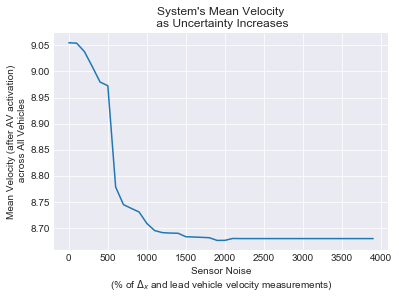

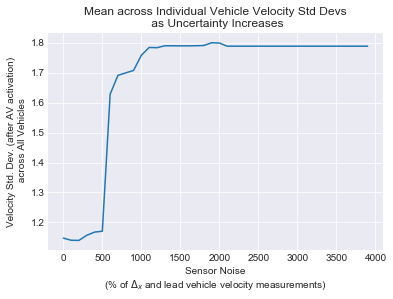

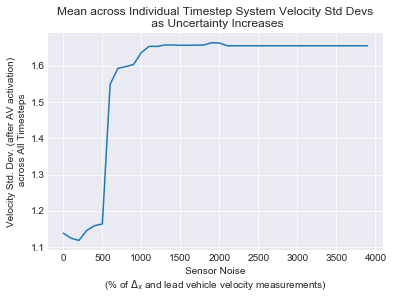

In [19]:
extension_three(max_sigma_pct=4000, granularity=100)

In [20]:
# Build noisiest env to investigate behavior
env = RingRoad(
    num_vehicles = 22,  # The vechicles at index 0 is an A.V.
    ring_length = 230.0,  # The road is a cicle.
    starting_noise = 4.0,  # Uniformly add noise to starting positions.
    temporal_res = 0.3,  # Set the size of simulation steps (seconds).
    av_activate = 30,  # Set when the PID controller is activated.
    seed = 286,  # Set a random seed.
    uncertain_avs=True,
    sigma_pct=40
)

# Run simulation for set number of time steps:
total_time = 50  # In seconds.
total_steps = int(np.ceil(total_time / env.dt))
env.run(steps=total_steps)

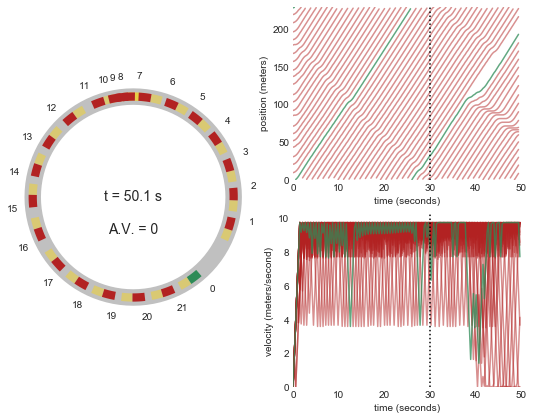

In [21]:
# Show step of simulation:
step = env.step
fig, axs = env.plot_dashboard(
    step=step, total_steps=total_steps,
    draw_cars_to_scale=True, draw_safety_buffer=True, label_step=True, label_cars=True,
)